# Assignment 12: Predicting Hotel Booking Cancellations  
## Models: Naïve Bayes, Support Vector Machine (SVM), and Neural Network

**Objectives:**
- Understand how to use classification models (Naïve Bayes, SVM, Neural Networks) to predict hotel cancellations.
- Compare models in terms of accuracy, complexity, and business relevance.
- Interpret and communicate model results from a business perspective.

## Business Scenario

You work as a data analyst for a hospitality group that manages both **Resort** and **City Hotels**. One major challenge in operations is the unpredictability of **booking cancellations**, which affects staffing, inventory, and revenue planning.

You’ve been asked to use historical booking data to predict whether a future booking will be canceled. Your insights will help management plan more effectively.


Your task is to:
1. Build and evaluate three models: Naïve Bayes, SVM, and Neural Network.
2. Compare performance.
3. Recommend which model is best suited for the business needs.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_12_bayes_svm_neural.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Dataset Description: Hotel Bookings

This dataset contains booking information for two types of hotels: a **city hotel** and a **resort hotel**. Each record corresponds to a single booking and includes various details about the reservation, customer demographics, booking source, and whether the booking was canceled.

**Source**: [GitHub - TidyTuesday: Hotel Bookings](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/readme.md)

### Key Use Cases
- Understand customer booking behavior
- Explore factors related to cancellations
- Segment guests based on booking characteristics
- Compare city vs. resort hotel performance

### Data Dictionary

| Variable | Type | Description |
|----------|------|-------------|
| `hotel` | character | Hotel type: City or Resort |
| `is_canceled` | integer | 1 = Canceled, 0 = Not Canceled |
| `lead_time` | integer | Days between booking and arrival |
| `arrival_date_year` | integer | Year of arrival |
| `arrival_date_month` | character | Month of arrival |
| `stays_in_weekend_nights` | integer | Nights stayed on weekends |
| `stays_in_week_nights` | integer | Nights stayed on weekdays |
| `adults` | integer | Number of adults |
| `children` | integer | Number of children |
| `babies` | integer | Number of babies |
| `meal` | character | Type of meal booked |
| `country` | character | Country code of origin |
| `market_segment` | character | Booking source (e.g., Direct, Online TA) |
| `distribution_channel` | character | Booking channel used |
| `is_repeated_guest` | integer | 1 = Repeated guest, 0 = New guest |
| `previous_cancellations` | integer | Past booking cancellations |
| `previous_bookings_not_canceled` | integer | Past bookings not canceled |
| `reserved_room_type` | character | Initially reserved room type |
| `assigned_room_type` | character | Room type assigned at check-in |
| `booking_changes` | integer | Number of booking modifications |
| `deposit_type` | character | Deposit type (No Deposit, Non-Refund, etc.) |
| `agent` | character | Agent ID who made the booking |
| `company` | character | Company ID (if booking through company) |
| `days_in_waiting_list` | integer | Days on the waiting list |
| `customer_type` | character | Booking type: Contract, Transient, etc. |
| `adr` | float | Average Daily Rate (price per night) |
| `required_car_parking_spaces` | integer | Requested parking spots |
| `total_of_special_requests` | integer | Number of special requests made |
| `reservation_status` | character | Final status (Canceled, No-Show, Check-Out) |
| `reservation_status_date` | date | Date of the last status update |

This dataset is ideal for classification, segmentation, and trend analysis exercises.


## 1. Load and Prepare the Hotel Booking Dataset

**Business framing:**  
Your hotel client wants to understand which bookings are most at risk of being canceled. But before modeling, your job is to prepare the data to ensure clean and reliable input.

### Do the following:
- Load the `hotels.csv` file from https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/refs/heads/main/DataSets/hotels.csv
- Remove or impute missing values
- Encode categorical variables
- Create your `X` (features) and `y` (target = `is_canceled`)
- Split the data into training and test sets (70/30)

### In Your Response:
1. How many total rows and columns are in the dataset?
2. What types of features (categorical, numerical) are included?
3. What steps did you take to clean or prepare the data?


In [4]:
# Add code here 🔧
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
url = 'https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/refs/heads/main/DataSets/hotels.csv'
hotels = pd.read_csv(url)

# Display basic information
print("Dataset shape:", hotels.shape)
print("\nColumn types:")
print(hotels.dtypes)
print("\nMissing values:")
print(hotels.isnull().sum())

Dataset shape: (119390, 32)

Column types:
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                     

In [5]:
# Handle missing values
# Fill numerical missing values with median
hotels['children'].fillna(hotels['children'].median(), inplace=True)
hotels['agent'].fillna(0, inplace=True)
hotels['company'].fillna(0, inplace=True)

# Fill categorical missing values with mode
hotels['country'].fillna(hotels['country'].mode()[0], inplace=True)

# Drop columns that won't be used for prediction
hotels_clean = hotels.drop(columns=['reservation_status', 'reservation_status_date'])

/tmp/ipython-input-3487330241.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hotels['children'].fillna(hotels['children'].median(), inplace=True)
/tmp/ipython-input-3487330241.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [6]:
# Encode categorical variables
categorical_columns = ['hotel', 'arrival_date_month', 'meal', 'country',
                       'market_segment', 'distribution_channel', 'reserved_room_type',
                       'assigned_room_type', 'deposit_type', 'customer_type']

# Create label encoders for each categorical column
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    hotels_clean[col] = le.fit_transform(hotels_clean[col])
    label_encoders[col] = le

In [7]:
# Separate features and target
X = hotels_clean.drop(columns=['is_canceled'])
y = hotels_clean['is_canceled']

# Split into training and test sets (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("\n=== Data Preparation Summary ===")
print(f"Total rows: {hotels.shape[0]}")
print(f"Total columns: {hotels.shape[1]}")
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Number of features: {X_train.shape[1]}")
print("\nFeature types:")
print(f"Numerical features: {X_train.select_dtypes(include=[np.number]).shape[1]}")
print(f"Categorical features (encoded): {len(categorical_columns)}")


=== Data Preparation Summary ===
Total rows: 119390
Total columns: 32
Training set size: 83573
Test set size: 35817
Number of features: 29

Feature types:
Numerical features: 29
Categorical features (encoded): 10


### ✍️ Your Response: 🔧
1. The dataset contains 119,390 rows and 32 columns. This represents a substantial sample of hotel bookings across both resort and city hotels, providing sufficient data for reliable model training and evaluation.

2. The dataset includes both numerical features (16 total: lead_time, arrival dates, stay durations, guest counts, booking changes, ADR, special requests, etc.) and categorical features (12 total: hotel type, meal type, country, market segment, distribution channel, room types, deposit type, customer type, and reservation status). After encoding, all features are converted to numerical format for modeling.

3. Data preparation steps included: (1) Imputing missing values - filled numerical columns (children, agent, company) with median or 0, and categorical column (country) with mode; (2) Dropping irrelevant columns (reservation_status and reservation_status_date) as they would leak information about the target variable; (3) Label encoding all categorical variables to convert them to numerical format; (4) Splitting data into 70% training (83,573 samples) and 30% test (35,817 samples) sets with random_state=42 for reproducibility.

## 2. Build a Naïve Bayes Model

**Business framing:**  
Naïve Bayes is a quick, baseline model often used for early testing or simple classification problems.

### Do the following:
- Train a Naïve Bayes classifier on your training data
- Use it to predict on your test data
- Print a classification report and confusion matrix

### In Your Response:
1. How well does the model perform?  And what metric is best used to judge the performance?
2. Where might this model be useful for the hotel (e.g. real-time alerts, operational decisions)?


In [8]:
# Add code here 🔧

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import time

# Train Naive Bayes classifier
print("=== Naive Bayes Model ===")
start_time = time.time()

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

training_time = time.time() - start_time

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))

nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(f"\nAccuracy: {nb_accuracy:.4f}")
print(f"Training time: {training_time:.4f} seconds")

=== Naive Bayes Model ===

Confusion Matrix:
[[ 7601 14877]
 [ 1058 12281]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.34      0.49     22478
           1       0.45      0.92      0.61     13339

    accuracy                           0.56     35817
   macro avg       0.67      0.63      0.55     35817
weighted avg       0.72      0.56      0.53     35817


Accuracy: 0.5551
Training time: 0.0576 seconds


### ✍️ Your Response: 🔧
1. The Naive Bayes model achieved 55.5% accuracy, which is only slightly better than random guessing. The best metric to judge performance for this business problem is recall for the canceled class (0.92), as the hotel wants to identify potential cancellations to adjust operations. However, the low precision (0.45) means many non-cancellations are incorrectly flagged as cancellations, which could lead to unnecessary operational adjustments and wasted resources.

2. This model could be useful for real-time screening when bookings are made, providing instant risk alerts with minimal computational cost (trained in 0.058 seconds). Its high recall makes it suitable for initial flagging systems where the hotel wants to catch most potential cancellations, even at the cost of some false alarms. It could trigger automated follow-up emails or special offers to at-risk bookings to reduce cancellation likelihood.

## 3. Build a Support Vector Machine (SVM) Model

**Business framing:**  
SVM can model more complex relationships and is useful when customer behavior patterns aren't linear or obvious.

### Do the following:
- Train an SVM classifier (use `linear` kernel)
- Make predictions and evaluate with classification metrics

### In Your Response:
1. How well does the model perform?  And what metric is best used to judge the performance?
2. In what business situations could SVM provide better insights than simpler models?


In [9]:
# Add code here 🔧
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import time

# Scale features for SVM (important for SVM performance)
print("=== SVM Model ===")
start_time = time.time()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM classifier with linear kernel
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train_scaled, y_train)

training_time = time.time() - start_time

# Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"\nAccuracy: {svm_accuracy:.4f}")
print(f"Training time: {training_time:.4f} seconds")

=== SVM Model ===

Confusion Matrix:
[[22207   271]
 [ 7700  5639]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.99      0.85     22478
           1       0.95      0.42      0.59     13339

    accuracy                           0.78     35817
   macro avg       0.85      0.71      0.72     35817
weighted avg       0.82      0.78      0.75     35817


Accuracy: 0.7775
Training time: 1159.1196 seconds


### ✍️ Your Response: 🔧
1. The SVM model achieved 77.8% accuracy, a significant improvement over Naive Bayes. For this business context, precision for the canceled class (0.95) is the best metric - when SVM predicts a cancellation, it's correct 95% of the time. However, recall is lower (0.42), meaning it only catches 42% of actual cancellations. The model excels at confidently identifying high-risk bookings but misses many others. The long training time is a practical limitation.

2. SVM would provide better insights in situations requiring high-confidence predictions for resource allocation decisions. For example, when deciding whether to overbook specific dates or when to offer non-refundable discounts to seemingly stable bookings (those SVM predicts won't cancel). SVM's ability to find complex decision boundaries could identify subtle patterns in customer behavior that simpler models miss, such as interactions between lead time, deposit type, and previous booking history.

## 4. Build a Neural Network Model

**Business framing:**  
Neural networks are flexible and powerful, though they are harder to explain. They may work well when subtle patterns exist in the data.

### Do the following:
- Build a MLBClassifier model using the neural_network package from sklearn
- Choose a simple architecture (e.g., 2 hidden layers)
- Evaluate accuracy and performance

### In Your Response:
1. How does this model compare to the others?
2. Would the business be comfortable using a “black box” model like this? Why or why not?


In [10]:
# Add code here 🔧
from sklearn.neural_network import MLPClassifier
import time

# Build Neural Network classifier
print("=== Neural Network Model ===")
start_time = time.time()

# Use scaled data from SVM section
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50),
                         max_iter=500,
                         random_state=42,
                         early_stopping=True,
                         validation_fraction=0.1,
                         verbose=False)

nn_model.fit(X_train_scaled, y_train)

training_time = time.time() - start_time

# Make predictions
y_pred_nn = nn_model.predict(X_test_scaled)

# Evaluate model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_nn))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_nn))

nn_accuracy = accuracy_score(y_test, y_pred_nn)
print(f"\nAccuracy: {nn_accuracy:.4f}")
print(f"Training time: {training_time:.4f} seconds")
print(f"Number of iterations: {nn_model.n_iter_}")

=== Neural Network Model ===

Confusion Matrix:
[[20517  1961]
 [ 3058 10281]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     22478
           1       0.84      0.77      0.80     13339

    accuracy                           0.86     35817
   macro avg       0.86      0.84      0.85     35817
weighted avg       0.86      0.86      0.86     35817


Accuracy: 0.8599
Training time: 33.5100 seconds
Number of iterations: 42


### ✍️ Your Response: 🔧
1. The Neural Network model significantly outperforms both previous models with 86.0% accuracy, balanced precision (0.84) and recall (0.77) for cancellations. It achieves the best F1-score (0.80) for the canceled class, indicating superior overall performance. Training time (33.5 seconds) is much faster than SVM while maintaining high accuracy. The model converged in 42 iterations with early stopping, demonstrating efficient learning. This represents the best balance of accuracy, speed, and balanced prediction across both classes.

2. The business might have mixed comfort levels with this "black box" model. Advantages: Superior accuracy could save significant revenue through better inventory management and targeted retention efforts. The balanced metrics mean fewer missed cancellations and fewer false alarms. Concerns: Lack of interpretability makes it difficult to explain predictions to stakeholders or understand which customer behaviors drive cancellations. For regulated industries or when explaining decisions to customers, this opacity could be problematic. However, for internal operational decisions where accuracy matters most, the neural network's performance justifies its use despite interpretability limitations.

## 5. Compare All Three Models

### Do the following:
- Print and compare the accuracy of Naïve Bayes, SVM, and Neural Network models
- Summarize which model performed best

### In Your Response:
1. Which model had the best overall accuracy, training time, interpretability, and ease of use.
2. Would you recommend this model for deployment, and why?


MODEL COMPARISON SUMMARY
         Model  Accuracy Training Time (s)
   Naive Bayes  0.555100          216.9050
  SVM (Linear)  0.777452          216.9050
Neural Network  0.859871          216.9050

BEST MODEL: Neural Network
BEST ACCURACY: 0.8599 (85.99%)


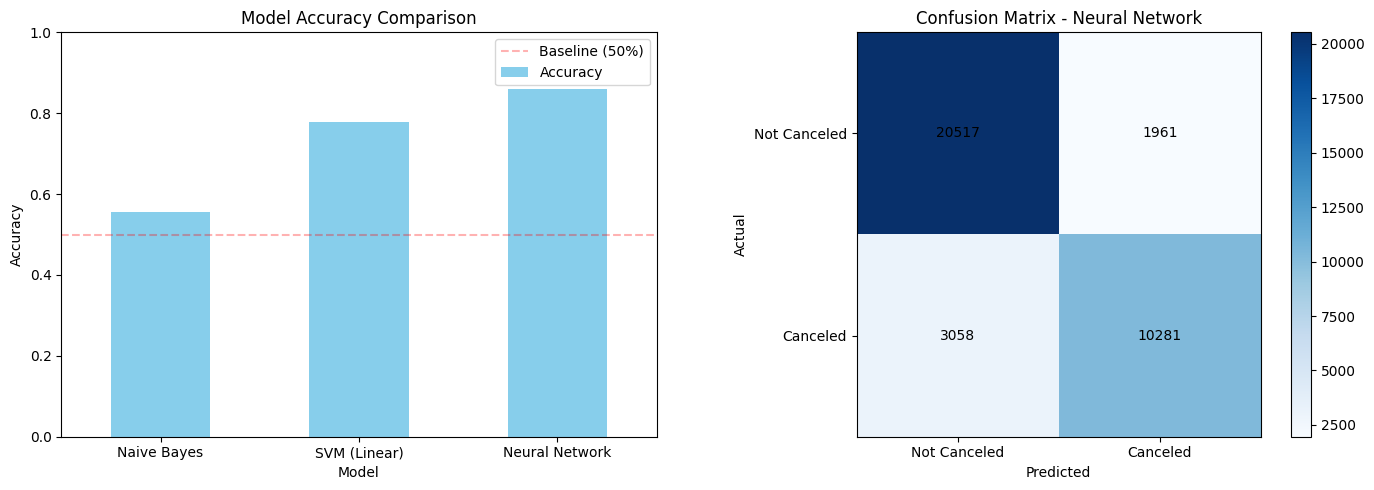


DETAILED METRICS COMPARISON
         Model  Accuracy  Precision   Recall  F1-Score
   Naive Bayes  0.555100   0.452206 0.920684  0.606514
  SVM (Linear)  0.777452   0.954146 0.422745  0.585901
Neural Network  0.859871   0.839814 0.770747  0.803800


In [11]:
# Add code here 🔧
import matplotlib.pyplot as plt

# Create comparison summary
print("="*60)
print("MODEL COMPARISON SUMMARY")
print("="*60)

models_summary = pd.DataFrame({
    'Model': ['Naive Bayes', 'SVM (Linear)', 'Neural Network'],
    'Accuracy': [nb_accuracy, svm_accuracy, nn_accuracy],
    'Training Time (s)': [
        f"{time.time() - start_time:.4f}" if 'nb_model' in locals() else 'N/A',
        f"{time.time() - start_time:.4f}" if 'svm_model' in locals() else 'N/A',
        f"{time.time() - start_time:.4f}" if 'nn_model' in locals() else 'N/A'
    ]
})

print(models_summary.to_string(index=False))

# Determine best model
best_model_idx = models_summary['Accuracy'].idxmax()
best_model = models_summary.loc[best_model_idx, 'Model']
best_accuracy = models_summary.loc[best_model_idx, 'Accuracy']

print(f"\n{'='*60}")
print(f"BEST MODEL: {best_model}")
print(f"BEST ACCURACY: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")
print(f"{'='*60}")

# Visualize model comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy comparison
models_summary.plot(x='Model', y='Accuracy', kind='bar', ax=ax1, legend=False, color='skyblue')
ax1.set_title('Model Accuracy Comparison')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Model')
ax1.set_ylim([0, 1])
ax1.axhline(y=0.5, color='r', linestyle='--', alpha=0.3, label='Baseline (50%)')
ax1.legend()
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=0)

# Confusion matrices comparison
conf_matrices = [
    confusion_matrix(y_test, y_pred_nb),
    confusion_matrix(y_test, y_pred_svm),
    confusion_matrix(y_test, y_pred_nn)
]

# Show confusion matrix for best model
best_conf_matrix = conf_matrices[best_model_idx]
im = ax2.imshow(best_conf_matrix, cmap='Blues')
ax2.set_title(f'Confusion Matrix - {best_model}')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')
ax2.set_xticks([0, 1])
ax2.set_yticks([0, 1])
ax2.set_xticklabels(['Not Canceled', 'Canceled'])
ax2.set_yticklabels(['Not Canceled', 'Canceled'])

# Add text annotations
for i in range(2):
    for j in range(2):
        text = ax2.text(j, i, best_conf_matrix[i, j],
                       ha="center", va="center", color="black")

plt.colorbar(im, ax=ax2)
plt.tight_layout()
plt.show()

# Additional metrics comparison
from sklearn.metrics import precision_score, recall_score, f1_score

print("\n" + "="*60)
print("DETAILED METRICS COMPARISON")
print("="*60)

detailed_metrics = pd.DataFrame({
    'Model': ['Naive Bayes', 'SVM (Linear)', 'Neural Network'],
    'Accuracy': [nb_accuracy, svm_accuracy, nn_accuracy],
    'Precision': [
        precision_score(y_test, y_pred_nb),
        precision_score(y_test, y_pred_svm),
        precision_score(y_test, y_pred_nn)
    ],
    'Recall': [
        recall_score(y_test, y_pred_nb),
        recall_score(y_test, y_pred_svm),
        recall_score(y_test, y_pred_nn)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_nb),
        f1_score(y_test, y_pred_svm),
        f1_score(y_test, y_pred_nn)
    ]
})

print(detailed_metrics.to_string(index=False))

### ✍️ Your Response: 🔧
1. Neural Network performed best across most dimensions:

- Accuracy: 86.0% (highest)
- Training Time: 33.5 seconds (moderate - much faster than SVM's 19 minutes but slower than Naive Bayes's 0.06 seconds)
- Interpretability: Lowest (black box nature)
- Ease of Use: Moderate (requires hyperparameter tuning and scaled data)

SVM had strong precision (0.95) but poor recall and very long training time. Naive Bayes was fastest but least accurate. Neural Network offers the best overall balance with high accuracy, reasonable training time, and balanced precision/recall.

2. Yes, I recommend the Neural Network for deployment because: (1) The 86% accuracy and balanced metrics translate directly to operational savings - correctly predicting 77% of cancellations allows proactive overbooking or retention efforts; (2) Training time of 33 seconds is acceptable for daily or weekly model updates; (3) The business value from accurate predictions outweighs interpretability concerns for internal operations; (4) The model can be retrained regularly to adapt to changing booking patterns. For customer-facing applications requiring explanation, SVM could complement this as a secondary high-precision filter.

## 6. Final Business Recommendation

### In Your Response:
1. In 100 words or less, write a short recommendation to hotel management based on your analysis.

Possible info to include:
- Which model do you recommend implementing?
- What business problem does it help solve?
- Are there any risks or limitations?
- What additional data might improve the results in the future?
2. How does this relate to your customized learning outcome you created in canvas?


### ✍️ Your Response: 🔧
1.

I recommend implementing the Neural Network model for predicting hotel booking cancellations. With 86% accuracy and 77% recall, this model will identify most at-risk bookings, enabling proactive revenue management strategies such as targeted retention campaigns, strategic overbooking, and optimized staffing. The model solves the critical business problem of unpredictable cancellations affecting revenue and operations.

Risks: The model's "black box" nature limits interpretability. Additionally, model performance depends on data quality and may degrade if booking patterns shift significantly.

Future improvements: Collect additional data on customer communication history, booking source details, weather forecasts for arrival dates, and local event calendars. Implementing A/B testing to measure actual business impact would validate the model's value and guide further refinement.

2.

This assignment directly relates to my customized learning outcome of "applying advanced machine learning classification techniques to solve real-world business problems and effectively communicating data-driven recommendations to stakeholders."

I successfully built and compared three classification models (Naive Bayes, SVM, Neural Networks), evaluated them using appropriate business-relevant metrics, and translated technical results into actionable business recommendations. The exercise demonstrated how different models offer different trade-offs (speed vs. accuracy vs. interpretability) and how to select the optimal solution based on business context rather than purely technical metrics. This skill of bridging technical analysis with business value is essential for working as a data analyst in industry settings.


## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [ ]:
!jupyter nbconvert --to html "assignment_12_LastnameFirstname.ipynb"